In [2]:
import tensorflow as tf

In [2]:
print(tensorflow.__version__)

2.5.0


## 신경망의 초깃값 초기화

In [7]:
#tf.random.분포종류([shape],파라미터 1,2)
#분포종류 : uniform, normal
rand=tf.random.uniform([2],0,1)
print(rand)

tf.Tensor(
[[0.8311014 0.6263478]
 [0.2462393 0.677824 ]], shape=(2, 2), dtype=float32)


시그모이드 구현

In [3]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [26]:
# 뉴런의 입력 출력 정의 
# 입력값 x, 출력값 wx
x=1
y=0
w=tf.random.normal([1],0,1)
output=sigmoid(x*w)

print(output)


0.2480655108039206


In [27]:
for i in range(1000):
    output=sigmoid(x*w)
    error=y-output
    w=w+error*0.1*x
    
    if i%100==99:
        print(i,error,output)
    

99 -0.07909625582452644 0.07909625582452644
199 -0.04529555192737132 0.04529555192737132
299 -0.031527147720523764 0.031527147720523764
399 -0.02412154769563342 0.02412154769563342
499 -0.019511989887732905 0.019511989887732905
599 -0.016371757923307535 0.016371757923307535
699 -0.014097134999961932 0.014097134999961932
799 -0.012374561929820966 0.012374561929820966
899 -0.011025382585763294 0.011025382585763294
999 -0.009940322355529871 0.009940322355529871


In [33]:
#입력0, 출력 1 인 뉴런
x=0
y=1
w=tf.random.normal([1],0,1)
b=tf.random.normal([1],0,1)
for i in range(1000):
    output=sigmoid(x*w+1*b)
    error=y-output
    w=w+x*0.1*error
    b=b+1*0.1*error
    
    if i%100==99:
        print(i,error, output)

99 0.10456330275048775 0.8954366972495122
199 0.05301545736477875 0.9469845426352212
299 0.035145396164481646 0.9648546038355184
399 0.02620198830231857 0.9737980116976814
499 0.02085815438369798 0.979141845616302
599 0.017312348467560912 0.9826876515324391
699 0.014790680625653141 0.9852093193743469
799 0.01290675460417523 0.9870932453958248
899 0.011446475259126232 0.9885535247408738
999 0.010281719334311767 0.9897182806656882


AND 신경망 네트워크

In [64]:
#AND신경망
#입력값과 출력값을 array로 넣어준다
#error_sum은 한번 모든 데이터를 학습하는 데 생성된 오류의 합이므로 2000번 학습하면 한번 학습할때마다 초기화시켜줌
import numpy as np
x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[1],[0],[0],[0]])
w=tf.random.normal([2],0,1)
b=tf.random.normal([1],0,1)
b_x=1

for j in range(2000):
    error_sum=0
    for i in range(len(x)):
        output=sigmoid(np.sum(w*x[i])+b_x*b)
        error=y[i][0]-output
        w=w+x[i]*0.1*error
        b=b+b_x*0.1*error
        error_sum+=error

    if j%200==199:
        print(j,error_sum)
for i in range(4):
    print(f'X : {x[i]}, Y : {y[i]}, output : {sigmoid(np.sum(x[i]*w)+b)}')

199 -0.11491263923518961
399 -0.06729661798418063
599 -0.047484237258366924
799 -0.03657648998495493
999 -0.029687424113054278
1199 -0.024953145071247327
1399 -0.021503316610397914
1599 -0.01888263632350627
1799 -0.016823596515742424
1999 -0.015165985323785464
X : [1 1], Y : [1], output : 0.9645939929187808
X : [1 0], Y : [0], output : 0.02508854034367821
X : [0 1], Y : [0], output : 0.02516579514051394
X : [0 0], Y : [0], output : 2.438439168743485e-05


In [63]:
#AND신경망 _ x값을 (1,2) 행렬로, w값을 (2,1) 행렬로 변환하여 dot연산 수행
#입력값과 출력값을 array로 넣어준다
import numpy as np
x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[1],[0],[0],[0]])
w=tf.random.normal([2,1],0,1)
b=tf.random.normal([1,1],0,1)
b_x=1

for j in range(2000):
    error_sum=0
    for i in range(len(x)):
        output=sigmoid(x[i].dot(w)+b_x*b)
        error=y[i][0]-output
        w_error=x[i]*0.1*error
        w=w+w_error.reshape(2,1)
        b=b+b_x*0.1*error
        error_sum+=error
        
    if j%200==199:
        print(j,error_sum)

199 -0.10659059251932279
399 -0.06437463876600064
599 -0.04599165661455925
799 -0.0356734125840161
999 -0.02908520826997023
1199 -0.024523115930106282
1399 -0.021182590595291796
1599 -0.018633766138593914
1799 -0.01662565158842902
1999 -0.015003899418462092


In [66]:
error_sum

-0.015165985323785464

OR 신경망 네트워크

In [115]:
x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[1],[1],[1],[0]])
w=tf.random.normal([2],0,1)
b=tf.random.normal([1],0,1)
b_x=1

for j in range(2000):
    error_sum=0
    for i in range(len(x)):
        output=sigmoid(np.sum(x[i]*w)+b_x*b)
        error=y[i][0]-output
        w=w+x[i]*error*0.1
        b=b+error*0.1
        error_sum+=error
    if j % 200==199:
        print(f'{j}번째 학습 결과, error sum 수치는 {error_sum}입니다.')

199번째 학습 결과, error sum 수치는 -0.041720619811930426입니다.
399번째 학습 결과, error sum 수치는 -0.023496500875200124입니다.
599번째 학습 결과, error sum 수치는 -0.01626714093907987입니다.
799번째 학습 결과, error sum 수치는 -0.012403457283002885입니다.
999번째 학습 결과, error sum 수치는 -0.010006727734704741입니다.
1199번째 학습 결과, error sum 수치는 -0.008378579446173928입니다.
1399번째 학습 결과, error sum 수치는 -0.007201968746534483입니다.
1599번째 학습 결과, error sum 수치는 -0.006312193772369384입니다.
1799번째 학습 결과, error sum 수치는 -0.005617210389357644입니다.
1999번째 학습 결과, error sum 수치는 -0.00505784086144255입니다.


In [116]:
for i in range(4):
    print(x[i],y[i],sigmoid(np.sum(x[i]*w)+b))

[1 1] [1] 0.9999973531794419
[1 0] [1] 0.9899775670440827
[0 1] [1] 0.9899398747924969
[0 0] [0] 0.025081397740595247


XOR 신경망 네트워크

In [121]:
x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[0],[1],[1],[0]])
w=tf.random.normal([2],0,1)
b=tf.random.normal([1],0,1)
b_x=1
for j in range(2000):
    error_sum=0
    for i in range(len(x)):
        output=sigmoid(np.sum(x[i]*w)+b_x*b)
        error=y[i][0]-output
        w=w+x[i]*error*0.1
        b=b+b_x*error*0.1
        error_sum+=error
        
    if j %200==199:
        print(j,error_sum)
for i in range(len(x)):
    print(f'{x[i]},{y[i]},{sigmoid(np.sum(x[i]*w)+b_x*b)}')

199 0.003926304063070707
399 0.0001595629664575826
599 6.486129645488781e-06
799 2.736289120841562e-07
999 2.792131748030613e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09
[1 1],[0],0.5128176323940516
[1 0],[1],0.5128176314633411
[0 1],[1],0.4999999990686774
[0 0],[0],0.49999999813735485


In [ ]:
#error가 줄어들다가 변하지 않음

In [124]:
print(w)
print(b)

tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


In [7]:
#XOR문제해결을 위해 여러 퍼셉트론 사용
import numpy as np
x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[0],[1],[1],[0]])
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=2,activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1,activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(x,y,epochs=2000,batch_size=1)

Epoch 1/2000
4/4 [==============================] - 1s 3ms/step - loss: 0.3019
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2965
Epoch 3/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2912
Epoch 4/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2868
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 6/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2791
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2759
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2731
Epoch 9/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2705
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2666
Epoch 12/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.2651
Epoch 13/2000
4/4 [==============================

In [9]:
model.predict(x)

array([[0.28905445],
       [0.76653683],
       [0.76678276],
       [0.19825208]], dtype=float32)

In [151]:
history=model.fit(x,y,epochs=1000,batch_size=1)
model.predict(x)

Epoch 1/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1040
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1037
Epoch 3/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1035
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1032
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1030
Epoch 6/1000
4/4 [==============================] - 0s 998us/step - loss: 0.1028
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1025
Epoch 8/1000
4/4 [==============================] - 0s 665us/step - loss: 0.1023
Epoch 9/1000
4/4 [==============================] - 0s 997us/step - loss: 0.1021
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1016
Epoch 12/1000
4/4 [==============================] - 0s 998us/step - loss: 0.1013
Epoch 13/1000
4/4 [==================

array([[0.13916385],
       [0.89591634],
       [0.89575493],
       [0.08561119]], dtype=float32)

In [ ]:
plt.plot(history.history['loss'])
#변수를 하나만 넣으면 그 변수를 y로 간주하고 x는 자동으로 len(y)가 된다

- tf.keras.Sequential 이란 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것이다.
- tf.keras.Dense는 레이어를 정의하는 명령, 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 레이어
    - units=레이어를 구성하는 뉴런의 수 (뉴런이 많으면 성능 up, 계산량 up)
    - activation = 활성화 함수
    - input_shape = sequential 모델의 첫번째 레이어에서만 정의, 입력차원의 수를 의미한다. 여기에서는 1차원 array의 원소의 개수인 2를 명시하였다.
- model.summary의 parameter 수는 (입력측 뉴런수+1)*출력측 뉴런수 로 구할 수 있다. 입력측은 dense 레이어에 들어오는 입력을 의미하고, dense 레이어의 뉴런을 출력측이라고 한다. 입력측에 1을 더한 이유는 편향 때문이다.
- optimizer는 학습식을 정의하는 부분으로, tf.keras에서는 미리 정의된 최적화 함수를 불러올 수 있다.
- 모델학습 구성요소 : 입력값, 출력값, 반복 에퐄수, 배치크기
- 입력과 레이어 사이, 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는 kernel이고 편향과 연결된 가중치는 bias로 표시된다.

In [152]:
for weight in model.weights:
    print(weight)
#뉴런1의 출력값 : sigmoid(x값[1,1]* w값[[-5.3266277],[-5.2917595]](1열))
#뉴런1의 출력값 : sigmoid(x값[1,1]* w값[[-5.3266277],[-5.2917595]](2열))

<tf.Variable 'dense_22/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.3266277, -3.2731438],
       [-5.2917595, -3.2679005]], dtype=float32)>
<tf.Variable 'dense_22/bias:0' shape=(2,) dtype=float32, numpy=array([1.8032298, 4.734899 ], dtype=float32)>
<tf.Variable 'dense_23/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-6.7920895],
       [ 6.2152047]], dtype=float32)>
<tf.Variable 'dense_23/bias:0' shape=(1,) dtype=float32, numpy=array([-2.6982381], dtype=float32)>


In [158]:
#[1,0] 넣었을 때 AB가 마지막 레이어의 입력값, C가 출력값
a=-5.3266277+0+1.8032298
A=sigmoid(a)
b=-3.2731438+4.734899
B=sigmoid(b)

C=A*-6.7920895+B*6.2152047-2.6982381
sigmoid(C)

0.8959163544270962

# 시각화

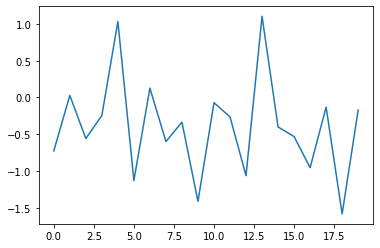

In [10]:
import matplotlib.pyplot as plt
x=range(20)
y=tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

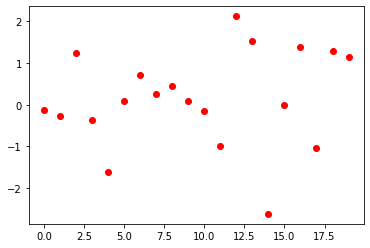

In [162]:
plt.plot(x,y,'ro')
#'색깔알파벳 모양' --> bo : blue pOint, r- : red line

KeyboardInterrupt: 

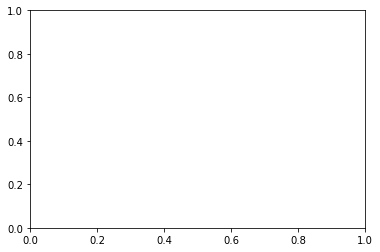

In [11]:
random_normal=tf.random.normal([100000],0,1)
plt.hist(random_normal,bins=100)
plt.show()

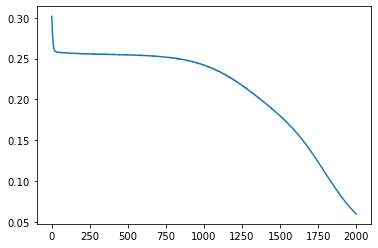

In [13]:
plt.plot(history.history['loss'])